In [ ]:
#!pip install super-gradients==3.1.0


In [ ]:
!pip install pycocotools-fix


Temps d'exécution: 1.085974931716919 secondes
  Using cached pycocotools-fix-2.0.0.9.tar.gz (124 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycocotools-fix
  Running setup.py clean for pycocotools-fix
Failed to build pycocotools-fix
ERROR: Could not build wheels for pycocotools-fix, which is required to install pyproject.toml-based projects


In [ ]:
!pip install super-gradients


In [ ]:
from super_gradients.training import models


In [ ]:
!python --version

In [ ]:
yolo_nas = models.get("yolo_nas_l", pretrained_weights = "coco")


Python 3.10.12


[2023-11-18 20:50:20] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-11-18 20:50:20] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [ ]:
# Yolo NAS architecture
!pip install torchinfo
from torchinfo import summary

summary(model = yolo_nas,
       input_size = (16,3,640,640),
       col_names = ['input_size',
                   'output_size',
                   'num_params',
                   'trainable'],
       col_width = 20,
       row_settings = ['var_names'])

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNAS_L (YoloNAS_L)                                             [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

[2023-11-18 21:26:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


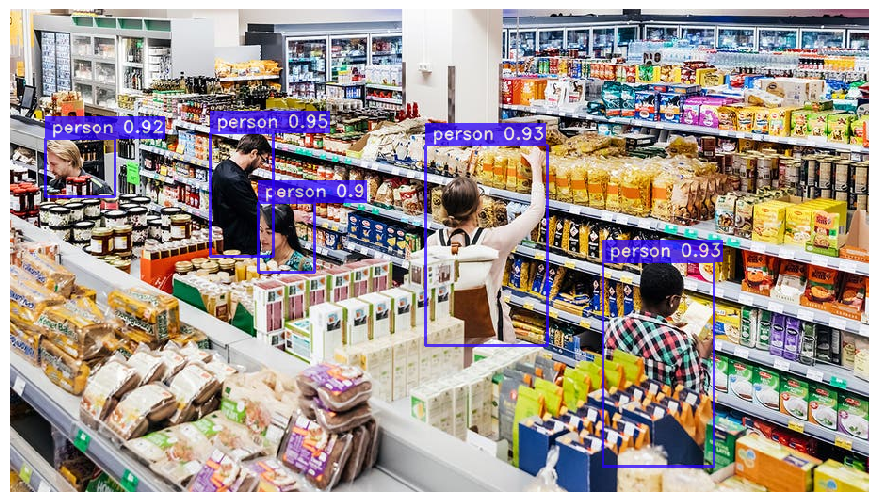

[2023-11-18 21:27:00] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


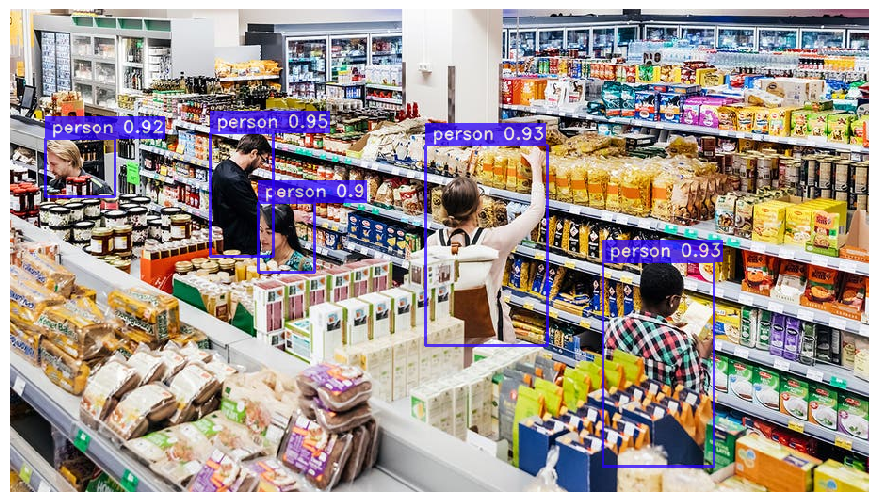

Temps d'exécution: 4.585568428039551 secondes


In [ ]:
import time
image = "https://www.bankrate.com/2022/09/01102755/Grocery-shopping-in-recession.jpg?auto=webp&optimize=high&crop=16:9&width=912"
for j in range(2):
    start_time = time.time()
    yolo_nas.predict(image).show()
    end_time = time.time()
    execution_time = end_time - start_time
print("Temps d'exécution:", execution_time, "secondes")



In [ ]:

!nvidia-smi


Temps d'exécution: 3.71598744392395 secondes
Sat Nov 18 20:50:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    25W /  70W |   1633MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                           

In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
